But what makes XGBoost so popular?

   * Speed and performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.

   * Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

   * Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.

   * Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.



In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
type(boston)

sklearn.utils.Bunch

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
import pandas as pd
import numpy as np
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
data['PRICE'] = boston.target

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### cat values (dummies/hot encoding)

If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. 

Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally. You can check out this link if you wish to know more on this.

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [19]:
#dem numpy slicing
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [26]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


## XGBoost's hyperparameters

   * learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
   * max_depth: determines how deeply each tree is allowed to grow during any boosting round.
   * subsample: percentage of samples used per tree. Low value can lead to underfitting.
   * colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
   * n_estimators: number of trees you want to build.
   * objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

   * gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
   * alpha: L1 regularization on leaf weights. A large value leads to more regularization.
   * lambda: L2 regularization on leaf weights and is smoother than L1 regularization.


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the XGBClassifier() class.

In [28]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [29]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[19:48:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:48:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.915756


## k-fold Cross Validation using XGBoost

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

   * num_boost_round: denotes the number of trees you build (analogous to n_estimators)
   * metrics: tells the evaluation metrics to be watched during CV
   * as_pandas: to return the results in a pandas DataFrame.
   * early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
   * seed: for reproducibility of results.

This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

In [32]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:50:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.654680,0.033232,21.671270,0.060739
1,19.749899,0.043431,19.775093,0.030386
2,18.041172,0.035789,18.141612,0.038490
3,16.439292,0.071153,16.558765,0.049051
4,15.062128,0.102330,15.247310,0.089738


In [34]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.953011
Name: test-rmse-mean, dtype: float64


## Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [35]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:50:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [500, 10]

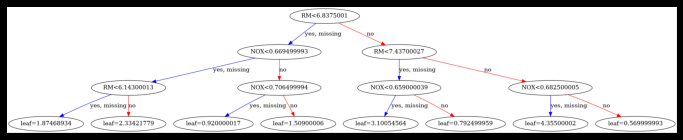

In [52]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

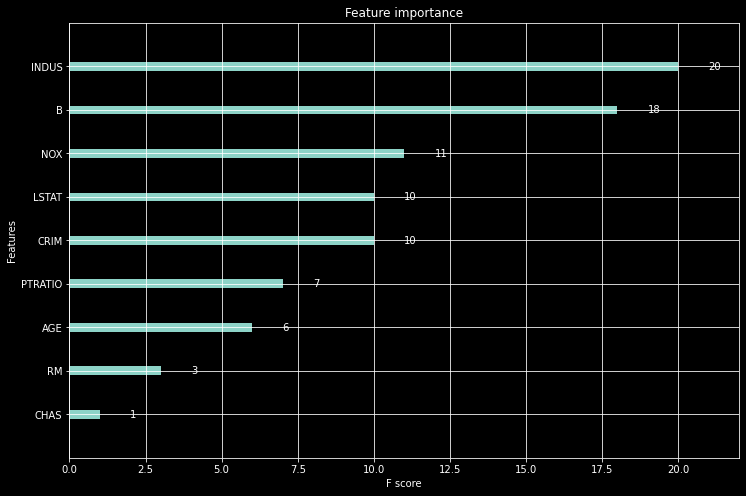

In [53]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()
